# HTML

웹 페이지를 만들기 위한 언어로 웹 브라우저에서 동작하는 언어.

- HT - HyperText, 문서와 문서가 링크로 연결되어져 있다.
- M - Markup, 태그로 이루어져있다.
- L - Language

아래는 간단하게 작성된 HTML 문서의 예제이다.
```html
<!DOCTYPE html>
<html>
  <head>
    <title> HTML 문서 </title>
  </head>
  <body>
    <h1> 이것은 HTML 문서입니다! </h1>
  </body>
</html>
```

<태그명 속성명1="속성값1" 속성명2="속성값2"> 콘텐츠 </태그명>
: 태그는 콘텐츠를 감싸서 그 정보의 성격과 의미를 정의함.

# Beautifulsoup

In [3]:
from bs4 import BeautifulSoup

In [4]:
# HTML 문서를 문자열 html로 저장
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

In [5]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

- soup.select('태그명') : 태그를 입력으로 사용할 경우
- soup.select('.클래스명') : 클래스를 입력으로 사용할 경우  
- soup.select('#아이디') : ID를 입력으로 사용할 경우  
- soup.select('상위태그 하위태그') : 자손 관계 (띄어쓰기)
- soup.select('상위태그 > 하위태그') : 자식 관계 ( > )


In [6]:
# <body> 태그를 입력
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [7]:
print(soup.select('h1 .name .menu')) # 태그명 h1 자손인 클래스 .name의 자손인 클래스 .menu의 정보

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


# 크롤링 및 차트 그리기

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

In [2]:
import requests

In [3]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

requests라는 패키지에 있는 get이라는 모듈(함수)에 url을 입력으로 하고, 이를 변수에 저장한 후에 변수.text를 하면 해당 URL의 HTML 코드를 받아올 수 있다.

In [4]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers) # 크롤링 방지 뚫기

headers에 대한 설명 : https://hogni.tistory.com/64

In [5]:
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/world.css">\n</head>\n<body>\n<script

In [6]:
from bs4 import BeautifulSoup as bs

html = bs(response.text, 'html.parser')
html_table = html.select("table")

len(html_table)

2

In [7]:
table = pd.read_html(str(html_table)) # read_html : html을 데이터프레임으로

In [8]:
table[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.07.23,268500.0,1000.0,269000.0,271500.0,268000.0,242884.0
2,2021.07.22,269500.0,2000.0,269500.0,270000.0,266500.0,299521.0
3,2021.07.21,267500.0,5500.0,276000.0,276000.0,267500.0,525377.0
4,2021.07.20,273000.0,10000.0,266500.0,275500.0,266000.0,1113782.0
5,2021.07.19,263000.0,6000.0,271500.0,272000.0,263000.0,463187.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021.07.16,269000.0,2500.0,264500.0,272000.0,262500.0,578040.0


In [9]:
table[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.23,268500.0,1000.0,269000.0,271500.0,268000.0,242884.0
2,2021.07.22,269500.0,2000.0,269500.0,270000.0,266500.0,299521.0
3,2021.07.21,267500.0,5500.0,276000.0,276000.0,267500.0,525377.0
4,2021.07.20,273000.0,10000.0,266500.0,275500.0,266000.0,1113782.0
5,2021.07.19,263000.0,6000.0,271500.0,272000.0,263000.0,463187.0
9,2021.07.16,269000.0,2500.0,264500.0,272000.0,262500.0,578040.0
10,2021.07.15,266500.0,5500.0,262000.0,270000.0,261500.0,458007.0
11,2021.07.14,261000.0,2000.0,263000.0,264000.0,260000.0,364977.0
12,2021.07.13,263000.0,500.0,265500.0,267500.0,262500.0,342811.0
13,2021.07.12,262500.0,500.0,265500.0,267500.0,262500.0,301660.0


In [10]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, 100):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())

https://finance.naver.com/item/sise_day.nhn?code=068270&page=1
https://finance.naver.com/item/sise_day.nhn?code=068270&page=2
https://finance.naver.com/item/sise_day.nhn?code=068270&page=3
https://finance.naver.com/item/sise_day.nhn?code=068270&page=4
https://finance.naver.com/item/sise_day.nhn?code=068270&page=5
https://finance.naver.com/item/sise_day.nhn?code=068270&page=6
https://finance.naver.com/item/sise_day.nhn?code=068270&page=7
https://finance.naver.com/item/sise_day.nhn?code=068270&page=8
https://finance.naver.com/item/sise_day.nhn?code=068270&page=9
https://finance.naver.com/item/sise_day.nhn?code=068270&page=10
https://finance.naver.com/item/sise_day.nhn?code=068270&page=11
https://finance.naver.com/item/sise_day.nhn?code=068270&page=12
https://finance.naver.com/item/sise_day.nhn?code=068270&page=13
https://finance.naver.com/item/sise_day.nhn?code=068270&page=14
https://finance.naver.com/item/sise_day.nhn?code=068270&page=15
https://finance.naver.com/item/sise_day.nhn?code=

In [11]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.23,268500.0,1000.0,269000.0,271500.0,268000.0,242884.0
2,2021.07.22,269500.0,2000.0,269500.0,270000.0,266500.0,299521.0
3,2021.07.21,267500.0,5500.0,276000.0,276000.0,267500.0,525377.0
4,2021.07.20,273000.0,10000.0,266500.0,275500.0,266000.0,1113782.0
5,2021.07.19,263000.0,6000.0,271500.0,272000.0,263000.0,463187.0
...,...,...,...,...,...,...,...
9,2017.07.20,114600.0,100.0,116100.0,116900.0,114500.0,1025412.0
10,2017.07.19,114700.0,4200.0,111300.0,115000.0,110000.0,748129.0
11,2017.07.18,110500.0,200.0,110900.0,111600.0,109600.0,417487.0
12,2017.07.17,110700.0,1400.0,111200.0,111700.0,110100.0,577683.0


In [13]:
df = df.dropna()
df = df.iloc[0:30] 
df = df.sort_values(by='날짜') # 오름차순 정렬

In [14]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.06.14,281000.0,15500.0,272500.0,281500.0,269000.0,1522976.0
12,2021.06.15,275000.0,6000.0,281000.0,281500.0,275000.0,610595.0
11,2021.06.16,271500.0,3500.0,274500.0,274500.0,270000.0,399618.0
10,2021.06.17,269000.0,2500.0,270000.0,272000.0,268500.0,387652.0
9,2021.06.18,270000.0,1000.0,269000.0,272000.0,269000.0,476193.0
5,2021.06.21,280500.0,10500.0,270000.0,281500.0,268500.0,1005972.0
4,2021.06.22,274000.0,6500.0,280000.0,280500.0,273500.0,534404.0
3,2021.06.23,281500.0,7500.0,275000.0,284000.0,274000.0,955076.0
2,2021.06.24,278500.0,3000.0,283000.0,284500.0,275500.0,550836.0
1,2021.06.25,265500.0,13000.0,279500.0,281000.0,261000.0,1113863.0


In [15]:
len(df)

30

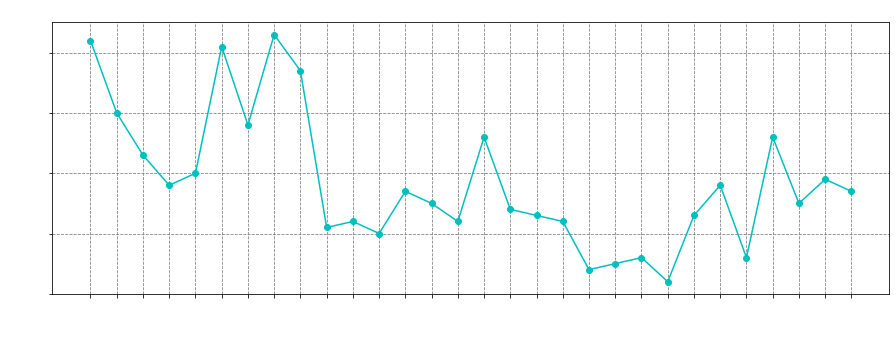

In [23]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)', color='white')
plt.xticks(color='white', rotation=45) 
plt.yticks(color='white')
plt.plot(df['날짜'], df['종가'], 'co-') # co- : 청록색
plt.grid(color='gray', linestyle='--') # -- : 실선
plt.show()

# 캔들차트

In [24]:
import mplfinance as mpf

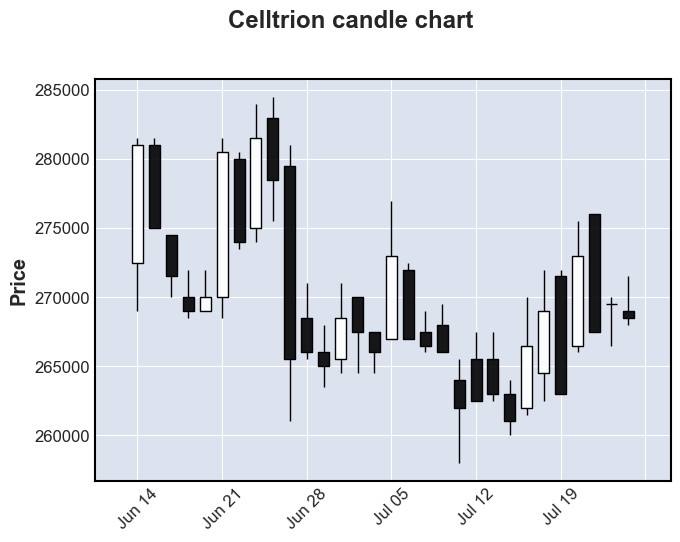

In [25]:
# 한글 컬럼명을 영어 컬럼명으로 변경
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

# 네이버 데이터는 날짜가 내림차순 정렬이므로 오름차순으로 변경
df = df.sort_values(by='Date')

# Date 컬럼을 DatetimeIndex 타입으로 변경 후 인덱스로 설정
df.index = pd.to_datetime(df.Date)

# Open, High, Low, Close, Volume 컬럼만 갖도록 데이터프레임 구조 변경
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 코드 한 줄로 캔들 차트 그리기
mpf.plot(df, title='Celltrion candle chart', type='candle')

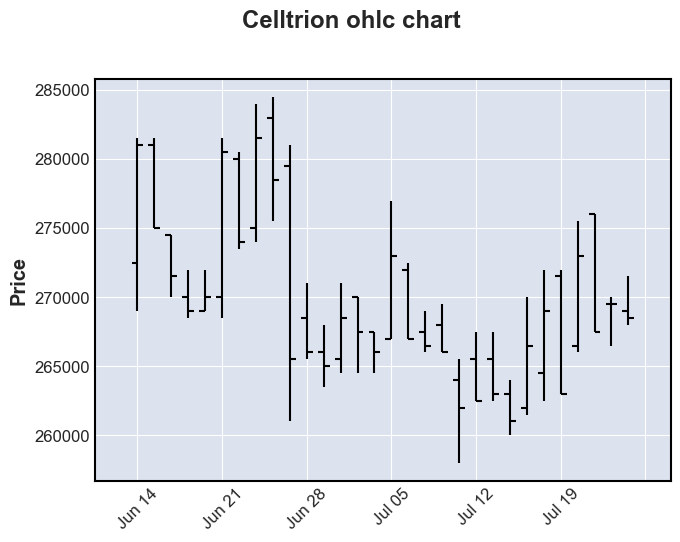

In [26]:
# type 인수를 ohlc로 변경하면 또 다른 종류의 차트를 출력할 수 있다.
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

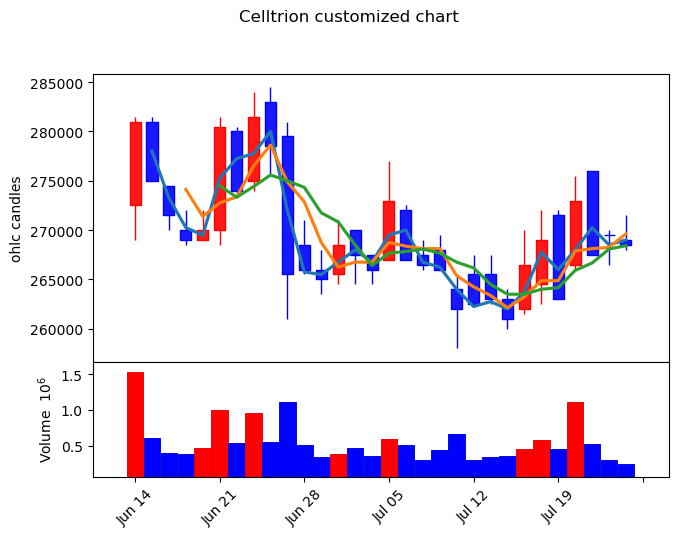

In [27]:
# 캔들의 색상을 바꾸거나 차트 하단에 그래프를 추가하여 거래량 표시도 가능하다.
# 이동 평균선도 세 개까지 지정해서 출력할 수 있다.

# kwargs는 keyword arguments의 약자이며 mpf.plot() 함수를 호출할 때 쓰이는 여러 인수를 담는 딕셔너리.
kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')

# 마켓 색상은 스타일을 지정하는 필수 객체로, 상승은 red, 하락은 blue로 지정.
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

# 셀트리온 시세 OHLVC 데이터와 kwargs로 설정한 인수들과 스타일 객체를 인수로 넘겨주면서
# mpf.plot() 함수를 호출하여 차트를 출력
mpf.plot(df, **kwargs, style=s)